In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [9]:
#df = pd.read_csv('byStation.csv')
#df.columns = ['STATION','DATE','ENTRIES','EXITS']
df_final = pd.read_pickle('df_final.pickle')
df_final.head()

,STATION,DATE,ENTRIES,EXITS,name,score,geo
0,1 AV,01/01/2018,8427,9924,1st Ave,11,"(40.6508606878022, -73.94945514035334)"
1,1 AV,01/02/2018,18668,21328,1st Ave,11,"(40.6508606878022, -73.94945514035334)"
2,1 AV,01/03/2018,20417,22357,1st Ave,11,"(40.6508606878022, -73.94945514035334)"
3,1 AV,01/04/2018,12010,13472,1st Ave,11,"(40.6508606878022, -73.94945514035334)"
4,1 AV,01/05/2018,18891,21966,1st Ave,11,"(40.6508606878022, -73.94945514035334)"


In [42]:
df = df_final.drop(['score'],axis=1)
df['weekday'] = pd.to_datetime(df['DATE']).dt.weekday
df.head()

,STATION,DATE,ENTRIES,EXITS,name,geo,weekday
0,1 AV,01/01/2018,8427,9924,1st Ave,"(40.6508606878022, -73.94945514035334)",0
1,1 AV,01/02/2018,18668,21328,1st Ave,"(40.6508606878022, -73.94945514035334)",1
2,1 AV,01/03/2018,20417,22357,1st Ave,"(40.6508606878022, -73.94945514035334)",2
3,1 AV,01/04/2018,12010,13472,1st Ave,"(40.6508606878022, -73.94945514035334)",3
4,1 AV,01/05/2018,18891,21966,1st Ave,"(40.6508606878022, -73.94945514035334)",4


In [44]:
df['lat'] = df.geo.apply(lambda x: x[0])
df['long'] = df.geo.apply(lambda x: x[1])
df.head()

,STATION,DATE,ENTRIES,EXITS,name,geo,weekday,lat,long
0,1 AV,01/01/2018,8427,9924,1st Ave,"(40.6508606878022, -73.94945514035334)",0,40.650861,-73.949455
1,1 AV,01/02/2018,18668,21328,1st Ave,"(40.6508606878022, -73.94945514035334)",1,40.650861,-73.949455
2,1 AV,01/03/2018,20417,22357,1st Ave,"(40.6508606878022, -73.94945514035334)",2,40.650861,-73.949455
3,1 AV,01/04/2018,12010,13472,1st Ave,"(40.6508606878022, -73.94945514035334)",3,40.650861,-73.949455
4,1 AV,01/05/2018,18891,21966,1st Ave,"(40.6508606878022, -73.94945514035334)",4,40.650861,-73.949455


In [49]:
df['volume'] = df.ENTRIES + df.EXITS
df.head()

,STATION,DATE,ENTRIES,EXITS,name,geo,weekday,lat,long,volume
0,1 AV,01/01/2018,8427,9924,1st Ave,"(40.6508606878022, -73.94945514035334)",0,40.650861,-73.949455,18351
1,1 AV,01/02/2018,18668,21328,1st Ave,"(40.6508606878022, -73.94945514035334)",1,40.650861,-73.949455,39996
2,1 AV,01/03/2018,20417,22357,1st Ave,"(40.6508606878022, -73.94945514035334)",2,40.650861,-73.949455,42774
3,1 AV,01/04/2018,12010,13472,1st Ave,"(40.6508606878022, -73.94945514035334)",3,40.650861,-73.949455,25482
4,1 AV,01/05/2018,18891,21966,1st Ave,"(40.6508606878022, -73.94945514035334)",4,40.650861,-73.949455,40857


In [86]:
byMean = df.groupby('STATION').mean()
byMeanWeekend = df[df.weekday>4].groupby('STATION').mean()
byMeanWeek = df[df.weekday<=4].groupby('STATION').mean()
byMean.head()

,ENTRIES,EXITS,weekday,lat,long,volume
STATION,,,,,,
1 AV,16640.285714,17975.576923,3.0,40.650861,-73.949455,34615.862637
103 ST,24898.337912,15611.291209,3.0,40.760087,-73.975249,40509.629121
103 ST-CORONA,16990.513736,10904.483516,3.0,40.760087,-73.975249,27894.997253
104 ST,2476.923077,701.524725,3.0,40.843863,-73.836322,3178.447802
110 ST,9581.337912,6975.239011,3.0,40.617398,-73.959243,16556.576923


In [113]:
ct = pd.read_pickle('census_by_latlong.pickle')
ct.head()
ct.iloc[0].center_loc[0]

-74.045771731684184

In [114]:
def FindCensusTract(df1,df2):
    df1['CensusTract'] = np.nan
    
    for i in range(len(df1)):
        xy = np.array([df1.long[i],df1.lat[i]])
        dif = np.array([np.square(df2.iloc[k].center_loc[0]-xy[0])+np.square(df2.iloc[k].center_loc[1]-xy[1]) 
                        for k in range(len(df2))])
        ind = dif.argmin()
        df1.at[i,'CensusTract'] = df2['CensusTract'][ind]

    return(df1)

In [115]:
byMean = byMean.reset_index()
len(byMean)

380

In [116]:
temp = FindCensusTract(byMean,ct)

In [117]:
temp['CensusTract'] = temp.CensusTract.apply(lambda x: int(x))

In [118]:
temp.CensusTract.value_counts()

36061030900    66
36061004400    64
36061024000    37
36061002400    29
36061023802    20
36061000202    17
36061000500    11
36061023801    10
36085001800     9
36061029900     9
36061021000     8
36061005700     7
36061007100     5
36061004500     5
36061021400     4
36061031100     4
36085990100     3
36061008601     3
36061007600     3
36061001402     3
36061013700     3
36061019200     3
36061000900     3
36061011402     3
36061023600     3
36061012500     3
36061010000     2
36061015700     2
36061011900     2
36061006000     2
36061012000     2
36061008000     2
36061008200     2
36061025100     2
36061010200     2
36061030300     2
36061017300     2
36061015802     2
36085000600     1
36061024200     1
36061011300     1
36061014500     1
36061023100     1
36061008400     1
36061007200     1
36061021200     1
36061027900     1
36061024100     1
36061023300     1
36061022500     1
36061003100     1
36061005800     1
36061012800     1
36061013100     1
36061029300     1
3606102030

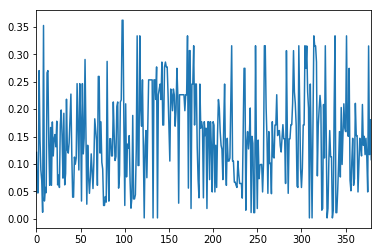

In [110]:
LO = list(ct[ct.CensusTract==36061005700].center_loc)[0][0]
LA = list(ct[ct.CensusTract==36061005700].center_loc)[0][1]
(abs(byMean.lat-LA)+abs(byMean.long-LO)).plot()

In [119]:
df_new = temp.merge(ct, on='CensusTract')
df_new = df_new.set_index('STATION')
df_new.CensusTract.value_counts()

36061030900    66
36061004400    64
36061024000    37
36061002400    29
36061023802    20
36061000202    17
36061000500    11
36061023801    10
36085001800     9
36061029900     9
36061021000     8
36061005700     7
36061007100     5
36061004500     5
36061021400     4
36061031100     4
36085990100     3
36061008601     3
36061007600     3
36061001402     3
36061013700     3
36061019200     3
36061000900     3
36061011402     3
36061023600     3
36061012500     3
36061010000     2
36061015700     2
36061011900     2
36061006000     2
36061012000     2
36061008000     2
36061008200     2
36061025100     2
36061010200     2
36061030300     2
36061017300     2
36061015802     2
36085000600     1
36061024200     1
36061011300     1
36061014500     1
36061023100     1
36061008400     1
36061007200     1
36061021200     1
36061027900     1
36061024100     1
36061023300     1
36061022500     1
36061003100     1
36061005800     1
36061012800     1
36061013100     1
36061029300     1
3606102030

In [6]:
# from scipy import stats
# import numpy as np
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [122]:
df_new.sort_values('volume',ascending=False).head(10)

,index,ENTRIES,EXITS,weekday,lat,long,volume,CensusTract,TotalPop,Women,Income,Poverty,Transit,Employed,center_loc
STATION,,,,,,,,,,,,,,,
34 ST-PENN STA,61,127057.491758,111318.032967,3.0,40.744587,-73.930997,238375.524725,36061023801,9403,4986,86712.0,10.2,79.6,4970,"[-73.9551603596, 40.75624538]"
GRD CNTRL-42 ST,233,111173.670330,105393.906593,3.0,40.751807,-73.976713,216567.576923,36061008000,5045,2740,110242.0,10.5,32.2,3307,"[-73.9776066526, 40.749652967]"
34 ST-HERALD SQ,59,87010.483516,89816.538462,3.0,40.744587,-73.930997,176827.021978,36061023801,9403,4986,86712.0,10.2,79.6,4970,"[-73.9551603596, 40.75624538]"
14 ST-UNION SQ,14,78714.134615,75190.552198,3.0,40.664767,-73.922521,153904.686813,36061002400,5557,2965,22676.0,38.2,55.7,1988,"[-73.9670652025, 40.7182920691]"
23 ST,46,84724.524725,66607.587912,3.0,40.884667,-73.900870,151332.112637,36061030900,9398,5145,27513.0,30.4,60.0,4022,"[-73.9117451419, 40.8746105507]"
TIMES SQ-42 ST,355,72945.464286,74993.425824,3.0,40.703844,-73.947355,147938.890110,36061002400,5557,2965,22676.0,38.2,55.7,1988,"[-73.9670652025, 40.7182920691]"
FULTON ST,226,72536.118132,61153.041209,3.0,40.677316,-73.983110,133689.159341,36061000900,1626,680,147500.0,6.0,51.9,1120,"[-74.0014427365, 40.6947309138]"
42 ST-PORT AUTH,68,69825.346154,59053.791209,3.0,40.824766,-73.944088,128879.137363,36061023100,6890,3926,45262.0,22.1,81.7,3770,"[-73.9436727148, 40.825953766]"
86 ST,110,68711.368132,56119.618132,3.0,40.752769,-73.979189,124830.986264,36061008200,3060,1499,107925.0,7.4,30.1,1983,"[-73.9803564224, 40.7508574979]"


In [ ]:
byMean.sort_values('Volume',ascending=False).head(10)

In [136]:
d_long = list(ct[ct.CensusTract==36061011201].center_loc)[0][0]-(-73.975309)
d_lat = list(ct[ct.CensusTract==36061011201].center_loc)[0][1]-40.763827
d_long, d_lat

(0.00066771727846060003, 0.00023651582769446122)

In [127]:
40.763827, -73.975444

['CensusTract',
 'TotalPop',
 'Women',
 'Income',
 'Poverty',
 'Transit',
 'Employed',
 'center_loc']

In [ ]:
40.763961, -73.975309

In [137]:
ct[ct.CensusTract==36061011201].center_loc

110    [-73.9747762827, 40.7640635158]
Name: center_loc, dtype: object